In [1]:
%matplotlib inline
# !pip install cv2
!pip install opencv-contrib-python
!pip install opencv-python

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
dir ="C:\\Users\\Surya Teja\\Desktop\\petImage\\cat"

from keras.preprocessing.image import ImageDataGenerator
from skimage import io

datagen = ImageDataGenerator(        
        rotation_range = 40,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        brightness_range = (0.5, 1.5),
        fill_mode = 'reflect'    
)

import numpy as np
import os


i = 0
for batch in datagen.flow_from_directory(directory =dir,
                                         batch_size = 16,
                                         target_size =(32,32),
                                         color_mode ='rgb',
                                         save_to_dir='C:\\Users\\Surya Teja\\Desktop\\augmented1\\cat',
                                         save_prefix='aug',
                                         save_format='png'):
    i += 1
    if i>40:
        break

Found 1000 images belonging to 2 classes.


In [3]:
dir ="C:\\Users\\Surya Teja\\Desktop\\petImage\\dog"

from keras.preprocessing.image import ImageDataGenerator
from skimage import io

datagen = ImageDataGenerator(        
        rotation_range = 40,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        brightness_range = (0.5, 1.5),
        fill_mode = 'reflect'    
)

import numpy as np
import os


i = 0
for batch in datagen.flow_from_directory(directory =dir,
                                         batch_size = 16,
                                         target_size =(32,32),
                                         color_mode ='rgb',
                                         save_to_dir='C:\\Users\\Surya Teja\\Desktop\\augmented1\\dog',
                                         save_prefix='aug',
                                         save_format='png'):
    i += 1
    if i>40:
        break


Found 1001 images belonging to 2 classes.


In [15]:
dir ="C:\\Users\\Surya Teja\\Desktop\\augmented1"
# there are 1312 images in cat folder and 1312 images in dog folder

categories = ['cat', 'dog']

data2 = []

for category in categories:
    
    path = os.path.join(dir, category)
    label = categories.index(category)
    
    for img in os.listdir(path):
        imgpath = os.path.join(path, img)
        pet_img = cv2.imread(imgpath,0)
        try:
            pet_img = cv2.resize(pet_img,(50,50))
# making image single array
            image = np.array(pet_img).flatten()
            data2.append([image,label])
        except Exception as e:
            pass

print(len(data2))   







2624


accuracy:  0.5762195121951219
Prediction is  :  cat


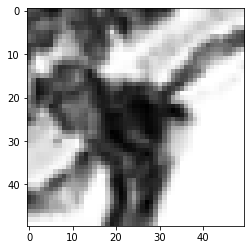

In [16]:
pick_in = open('data3.pickle', 'wb')
pickle.dump(data2, pick_in)
pick_in.close()


pick_in = open("C:\\Users\\Surya Teja\\Downloads\\data3.pickle",'rb')
data3 = pickle.load(pick_in)
pick_in.close()


random.shuffle(data3)
features = []
labels = []

for feature,label in data3:
    features.append(feature)
    labels.append(label)
    
x_train, x_test, y_train,y_test = train_test_split(features, labels, test_size = 0.25)

model = SVC(C=1, kernel='poly', gamma ='auto')
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
y_pred
accuracy = accuracy_score(y_pred,y_test)

categories =['cat', 'dog']

print("accuracy: ", accuracy)

print('Prediction is  : ',categories[y_pred[100]] )

mypet = x_test[50].reshape(50,50)
plt.imshow(mypet,cmap='gray')
plt.show()

In [18]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,

In [19]:
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.66      0.58      0.61       377
           1       0.51      0.59      0.55       279

    accuracy                           0.58       656
   macro avg       0.58      0.58      0.58       656
weighted avg       0.59      0.58      0.59       656

